In [90]:
import numpy as np
import pandas as pd

In [91]:
heart_data = pd.read_csv('~/Documents/heart 2.csv')

Look at descriptives

Check for values that don't belong in the data set for categorical variables (e.g., 'cp' should only be 0, 1, 2, or 3)

In [92]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Notes: 

> ca has a max value of 4, but the documentation says values should be 0-3, check for values that don't fall in that range

> thal has min val of 0, but documentation says values should be 3, 6, or 7; check for incorrect values

In [93]:
#Find values in 'ca' column that do not equal 0, 1, 2, or 3
heart_data[~((heart_data.loc[:, 'ca'] == 0) |
             (heart_data.loc[:, 'ca'] == 1) | 
             (heart_data.loc[:, 'ca'] == 2) | 
             (heart_data.loc[:, 'ca'] == 3))]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


chang ca = 4 to NaN because it's not a value in the variable

In [94]:
heart_data = heart_data.replace({'ca': {4: np.nan}})

In [95]:
#Find values in 'thal' column that do not equal 1, 2, or 3 ** NOTE: the documentation says 3, 6, or7;
# but values here are 1, 2, or 3 (???)
heart_data[~((heart_data.loc[:, 'thal'] == 1) |
             (heart_data.loc[:, 'thal'] == 2) | 
             (heart_data.loc[:, 'thal'] == 3))]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [96]:
#convert those to NaN becaues they're probably mis-typed
heart_data = heart_data.replace({'thal': {0: np.nan}})

Check data types of each column

In [97]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

All columns are numerical, so we don't have to worry about changing them to do any statstical analyses.


Identify whether any NaN values are in the dataframe

In [98]:
heart_data.isna().values.any()

True

I already knew NaN existed because I coerced some values to be NaN based on my understanding of the data. 

In order to avoid dropping data prematurely, I will assess how many NaN values there are:

In [99]:
heart_data[pd.isnull(heart_data).any(axis = 1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,NaN,1
92,52,1,2,138,223,0,1,169,0,0.0,2,NaN,2.0,1
158,58,1,1,125,220,0,1,144,0,0.4,1,NaN,3.0,1
163,38,1,2,138,175,0,1,173,0,0.0,2,NaN,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,NaN,2.0,1
251,43,1,0,132,247,1,0,143,1,0.1,1,NaN,3.0,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0.0,NaN,0


The only NaNs are the ones that I added earlier, but I will impute the values instead of dropping these rows. To do so:

Because both ca and thal are categorical variables, I'll find the mode value for the corresponding target (i.e., if NaN is in target 1, it will be transformed to the mode of that variable at target 1) and replace the NaN variable with that.
> Mode because mean isn't appropriate for categorical variables
> Mode instead of median because it's possible to get a "median" value that isn't appropriate for the categorical variables

In [100]:
#get the mode of ca/thal for target 1, target 0
ca_mode = heart_data.groupby('target').ca.apply(lambda x: x.mode())
thal_mode = heart_data.groupby('target').thal.apply(lambda x: x.mode())

Note: "mode" gives a numpy array, so to get the mode of target=1, then you have to index @ 1, then 0

In [101]:
#change the value of ca, thal NaNs to the appropriate mode:
heart_data['ca'] = heart_data.apply(
    lambda x: ca_mode[0][0] if ((x['target'] == 0) & np.isnan(x['ca'])) 
    else (ca_mode[1][0] if ((x['target'] == 1) & np.isnan(x['ca'])) else x['ca']), axis = 1)

heart_data['thal'] = heart_data.apply(
    lambda x: thal_mode[0][0] if ((x['target'] == 0) & np.isnan(x['thal'])) 
    else (thal_mode[1][0] if ((x['target'] == 1) & np.isnan(x['thal'])) else x['thal']), axis = 1)

In [102]:
#Check for NaN
heart_data[pd.isnull(heart_data).any(axis = 1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


There are no more NaN values

Check for duplicate rows

In [103]:
#check for duplicates, keeping all of them so we can see which rows match, instead of just the matched one
heart_data[heart_data.duplicated(keep = False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


Decided to remove duplicate because it's unlikely that there are two people in this small of a dataset with exactly the same data

drop_duplicates drops one instance

In [104]:
heart_data = heart_data.drop_duplicates()
heart_data.shape

(302, 14)

Identify & change/remove outliers in each column

Outliers are defined as values outside 1.5*the interquartile range(Q3-Q1)
> Get Q3, Q1, IQR, IQR * 1.5
> If value < Q1-(IQR*1.5) or value > Q3+(IQR*1.5), it's an outlier
> drop outliers


Only doing this for continuous variables (categorical don't have outliers)

In [105]:
Q1 = heart_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].quantile(.25)
Q3 = heart_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].quantile(.75)

IQR = Q3 - Q1
IQR

heart_data = heart_data.loc[~((heart_data > (Q3 + (IQR * 1.5))) | 
                              (heart_data < (Q1 - (IQR * 1.5)))).any(axis = 1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.049470,0.699647,0.985866,129.883392,242.314488,0.141343,0.522968,149.961131,0.318021,0.951943,1.427562,0.639576,2.314488,0.558304
std,9.128186,0.459224,1.031324,15.387795,44.654188,0.348992,0.514336,22.691625,0.466533,1.026400,0.599246,0.905532,0.580446,0.497469
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.500000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000


Look at data now that rows with outliers have been dropped

In [106]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.049470,0.699647,0.985866,129.883392,242.314488,0.141343,0.522968,149.961131,0.318021,0.951943,1.427562,0.639576,2.314488,0.558304
std,9.128186,0.459224,1.031324,15.387795,44.654188,0.348992,0.514336,22.691625,0.466533,1.026400,0.599246,0.905532,0.580446,0.497469
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.500000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000


Now that outliers, duplicates, and NaN have been evaluated and dropped, explore relationships between variables:

First, we'll look at continuous variables using mean values and exploration

> Continuous variables = age, trestbps, chol, thalach, oldpeak

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

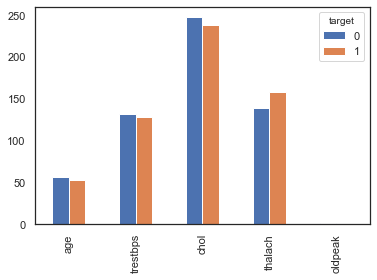

In [110]:
means_df = heart_data.groupby('target')[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].mean()
means_df.T.plot.bar()

**AT FIRST GLANCE:**

AGE: higher age w/HD

TRESTBPS: higher w/HD

CHOL: higher w/HD

THALACH: lower w/HD

OLDPEAK: higher w/HD

**Thalach and cholesterol seem to be best predictors here**

Get means based on other categorical variables:

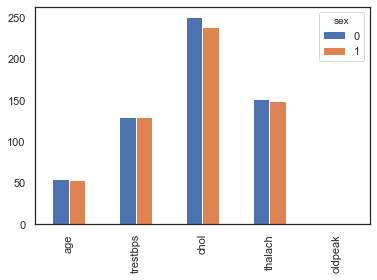

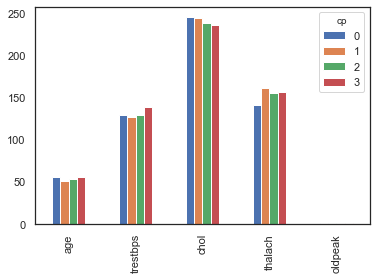

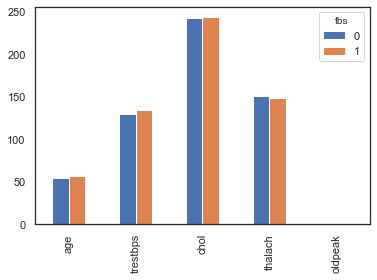

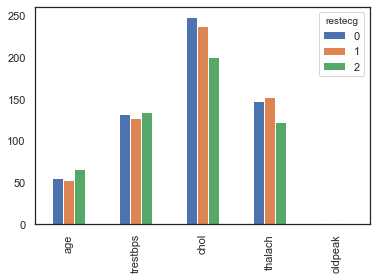

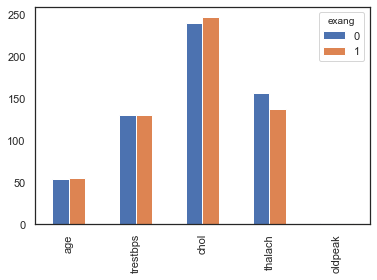

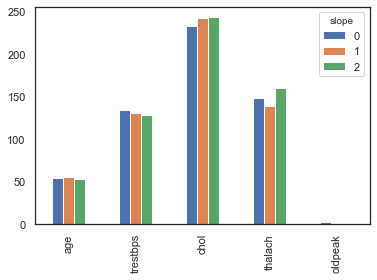

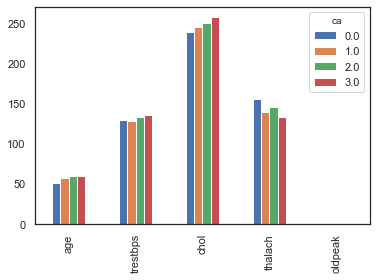

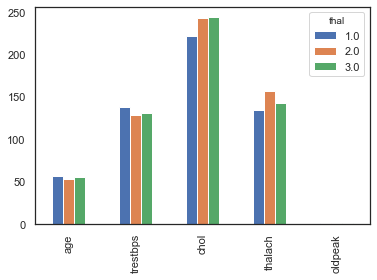

In [111]:
for x in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
    means_df = heart_data.groupby(x)[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].mean()
    means_df.T.plot.bar()

**AT FIRST GLANCE:**

Males and females pretty similar except on cholesterol

CP(3) has lower cholesterol than other CP groups; CP(0) has lower thalach / CP(1) has higher

CP(3) has higher trestbps than other gruops

Restecg 0 has highest cholesterol, 2 has lowest; 2 is oldest; 2 has lowest thalach

Exang only different at thalach (1<0)

To get general descriptives of categorical variables, we'll use the frequency of each level of the target at each level of the categorical variables:

> categorical variables: sex, cp, fbs, restecg, exang, slope, ca, and thal

In [112]:
for var in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
    print(heart_data.groupby(['target',var])[[var]].count())

            sex
target sex     
0      0     17
       1    108
1      0     68
       1     90
           cp
target cp    
0      0   93
       1    8
       2   17
       3    7
1      0   37
       1   41
       2   65
       3   15
            fbs
target fbs     
0      0    106
       1     19
1      0    137
       1     21
                restecg
target restecg         
0      0             73
       1             51
       2              1
1      0             64
       1             93
       2              1
              exang
target exang       
0      0         57
       1         68
1      0        136
       1         22
              slope
target slope       
0      0          8
       1         83
       2         34
1      0          8
       1         47
       2        103
             ca
target ca      
0      0.0   41
       1.0   43
       2.0   28
       3.0   13
1      0.0  128
       1.0   20
       2.0    7
       3.0    3
             thal
target thal      


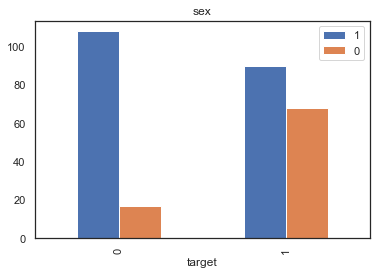

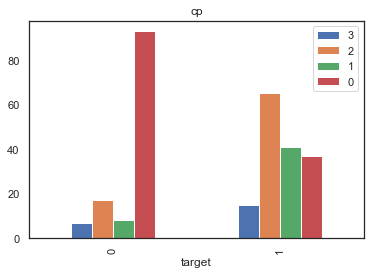

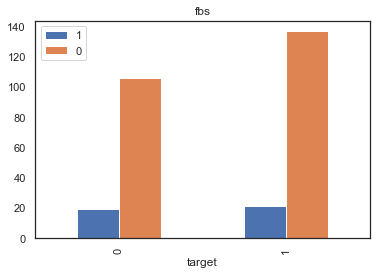

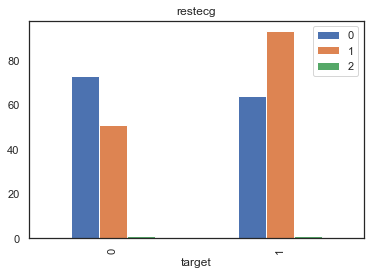

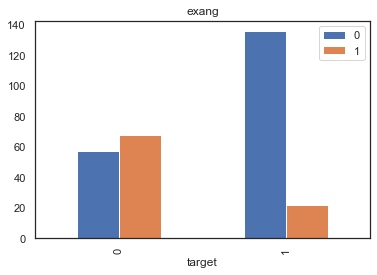

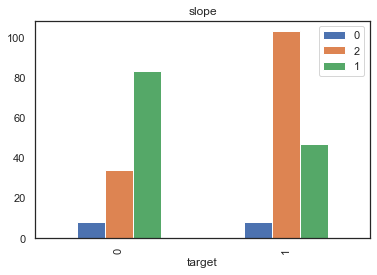

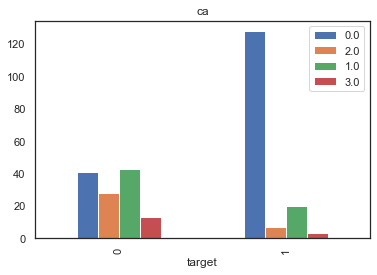

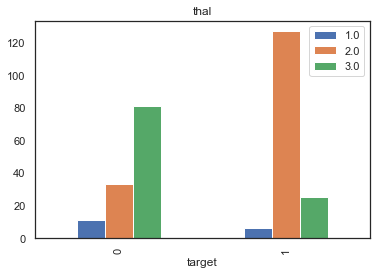

In [113]:
#bar graphs for each of the categorical variables
for var in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
    cols = {}
    for value in heart_data[var].unique():
        cols[value] = heart_data.loc[heart_data[var] == value].groupby(['target'])[var].count()
    x = pd.DataFrame(cols)
    x.plot.bar(title = var)

**AT FIRST GLANCE:**

SEX: more males with HD than without; more females without than with

CP: with HD, more @ 0; without HD, more evenly spread across values of cp

FBS: fbs = 0  higher without than with HD

RESTECG: With HD there are more @0 than 1; without HD there are more at 1 than 0

EXANG: more even with HD; without HD there are more @0

SLOPE: With HD more @1 than 2; Without HD more @2 than 1

CA: With HD relatively evenly spread across values; Without HD more at 0

THAL: with HD = 1 < 2 < 3; without HD: 2 is much larger than 1 or 3

Evaluate correlations of continuous variables:

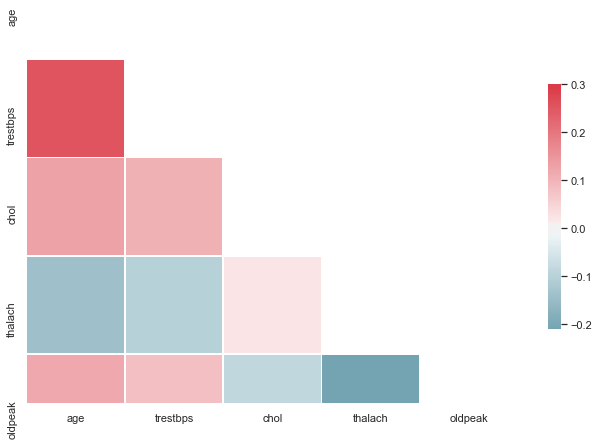

In [114]:
sns.set(style="white")

#split into two groups: one with HD and one without
with_hd = heart_data.loc[heart_data['target'] == 0]
without_hd = heart_data.loc[heart_data['target']==1]

# Compute the correlation matrix
corr = with_hd[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Relationships for those with heart disease:

> OLDER = higher old peak, lower thalach (slightly), higher cholesterol, higher trestpbs (strong)

> higher testbps = higher old peak (slightly), higher cholesterol (slightly)

> higher thalach = lower old peak (strong)


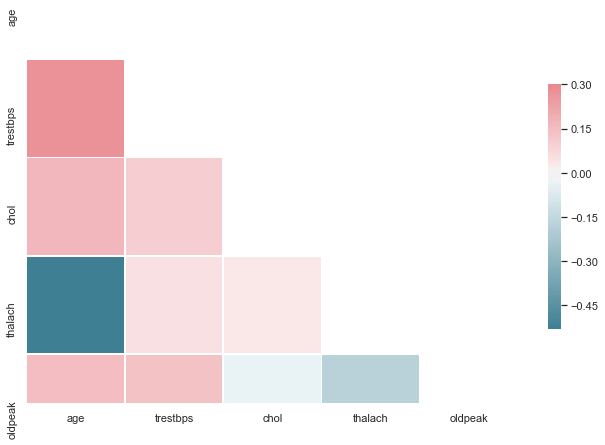

In [115]:
# Compute the correlation matrix for those WITHOUT hd
corr = without_hd[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Relationships in those without heart disease:

> OLDER = higher old peak (slightly), lower thalach (strong), higher chol, and higher trestbps

> trestbps higher = slightly higher old peak, thalach, and chol

> thalach higher = slightly lower old peak

Note differences in the relationships when heart disease is present vs when it is not. 

Most relationships are in the same direction.

Relationships are much weaker without heart disease except between age and thalach (where it's stronger of a negative relationship without HD than it is with)

Because these data have 0=heart disease and 1 = no heart disease, I'm going to switch them around so that 1=yes and 0=no

In [116]:
heart_data['target'] = heart_data['target'].apply(lambda x: 0 if x==1
                                                 else 1)
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0.0,3.0,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0.0,3.0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2.0,3.0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1.0,3.0,1


In [117]:
heart_data.to_csv('heart_data_clean.csv')